In [1]:
import os
import json

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', size=16)

In [3]:
MOPO_RESULTS_MAP_PATH = "../dogo_results/mopo/results_map.json"
with open(MOPO_RESULTS_MAP_PATH, 'r') as f:
    mopo_results_map = json.load(f)

RESULTS_BASEDIR = "../dogo_results/mopo"
get_results_path = lambda x: os.path.join(RESULTS_BASEDIR, x) if os.path.isfile(os.path.join(RESULTS_BASEDIR, x)) else x

In [4]:
def get_results(experiment: str, file: str):
    file_path = os.path.join(
        "ray_mopo",
        mopo_results_map[experiment]["environment"],
        mopo_results_map[experiment]["base_dir"],
        mopo_results_map[experiment]["experiment_dir"],
        file
    )
    
    result_repo_path = os.path.join(RESULTS_BASEDIR, file_path)
    if os.path.isfile(result_repo_path):
        file_path = result_repo_path

    extension = file.split(".")[-1]
    if extension == 'csv' or extension == 'txt':
        return pd.read_csv(file_path, header=None)
    elif extension == 'json':
        return pd.read_json(file_path, lines=True)
    else:
        raise RuntimeError('Unrecognised extension')

# MP068-MP069, MP072-MP073, MP078

In [5]:
MP068_total_loss_df        = get_results("MP068", "model_loss_history.txt")
MP068_pol_total_loss_df    = get_results("MP068", "model_pol_total_loss_history.txt")
MP068_pol_var_loss_df      = get_results("MP068", "model_pol_var_loss_history.txt")
MP068_pol_mean_loss_df     = get_results("MP068", "model_mean_pol_loss_history.txt")
MP068_ho_total_loss_df     = get_results("MP068", "model_holdout_loss_history.txt")
MP068_ho_pol_total_loss_df = get_results("MP068", "model_holdout_pol_total_loss_history.txt")
MP068_ho_pol_var_loss_df   = get_results("MP068", "model_holdout_pol_var_loss_history.txt")
MP068_ho_pol_mean_loss_df  = get_results("MP068", "model_holdout_mean_pol_loss_history.txt")

MP069_total_loss_df        = get_results("MP069", "model_loss_history.txt")
MP069_pol_total_loss_df    = get_results("MP069", "model_pol_total_loss_history.txt")
MP069_pol_var_loss_df      = get_results("MP069", "model_pol_var_loss_history.txt")
MP069_pol_mean_loss_df     = get_results("MP069", "model_mean_pol_loss_history.txt")
MP069_ho_total_loss_df     = get_results("MP069", "model_holdout_loss_history.txt")
MP069_ho_pol_total_loss_df = get_results("MP069", "model_holdout_pol_total_loss_history.txt")
MP069_ho_pol_var_loss_df   = get_results("MP069", "model_holdout_pol_var_loss_history.txt")
MP069_ho_pol_mean_loss_df  = get_results("MP069", "model_holdout_mean_pol_loss_history.txt")

MP078_total_loss_df        = get_results("MP078", "model_loss_history.txt")
MP078_pol_total_loss_df    = get_results("MP078", "model_pol_total_loss_history.txt")
MP078_pol_var_loss_df      = get_results("MP078", "model_pol_var_loss_history.txt")
MP078_pol_mean_loss_df     = get_results("MP078", "model_mean_pol_loss_history.txt")
MP078_ho_total_loss_df     = get_results("MP078", "model_holdout_loss_history.txt")
MP078_ho_pol_total_loss_df = get_results("MP078", "model_holdout_pol_total_loss_history.txt")
MP078_ho_pol_var_loss_df   = get_results("MP078", "model_holdout_pol_var_loss_history.txt")
MP078_ho_pol_mean_loss_df  = get_results("MP078", "model_holdout_mean_pol_loss_history.txt")

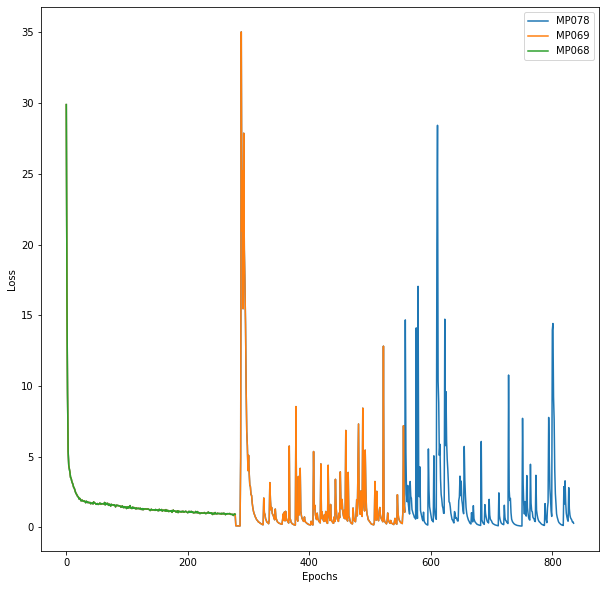

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP078_total_loss_df.mean(axis=1), label='MP078')
ax.plot(MP069_total_loss_df.mean(axis=1), label='MP069')
ax.plot(MP068_total_loss_df.mean(axis=1), label='MP068')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
pass

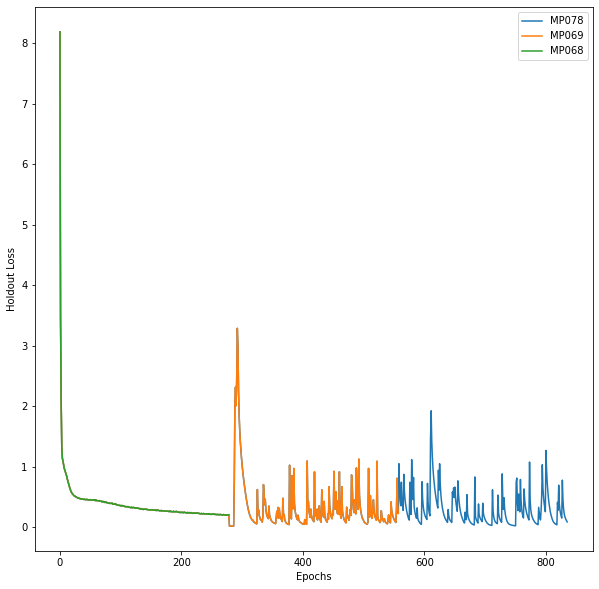

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP078_ho_total_loss_df.mean(axis=1), label='MP078')
ax.plot(MP069_ho_total_loss_df.mean(axis=1), label='MP069')
ax.plot(MP068_ho_total_loss_df.mean(axis=1), label='MP068')
ax.set_xlabel('Epochs')
ax.set_ylabel('Holdout Loss')
ax.legend()
pass

In [8]:
MP068_df = get_results("MP068", "result.json")
MP072_df = get_results("MP072", "result.json")

MP069_df = get_results("MP069", "result.json")
MP073_df = get_results("MP073", "result.json")
MP078_df = get_results("MP078", "result.json")

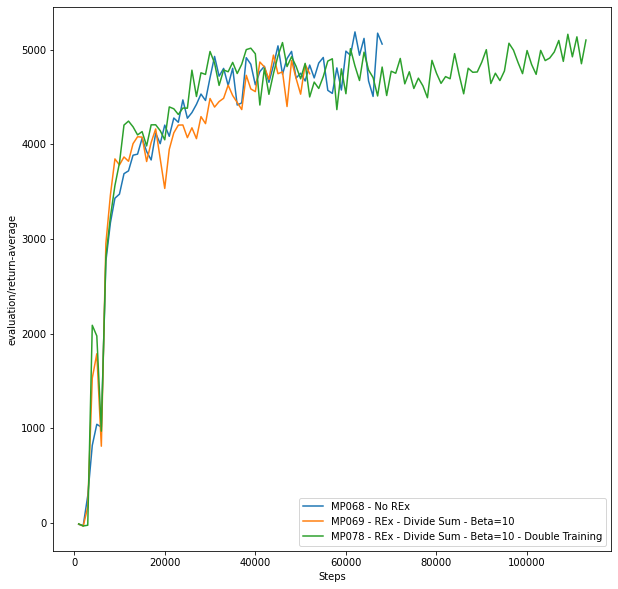

In [9]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP068_df['timesteps_total'], MP068_df[feature], label='MP068 - No REx')
ax.plot(MP069_df['timesteps_total'], MP069_df[feature], label='MP069 - REx - Divide Sum - Beta=10')
ax.plot(MP078_df['timesteps_total'], MP078_df[feature], label='MP078 - REx - Divide Sum - Beta=10 - Double Training')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

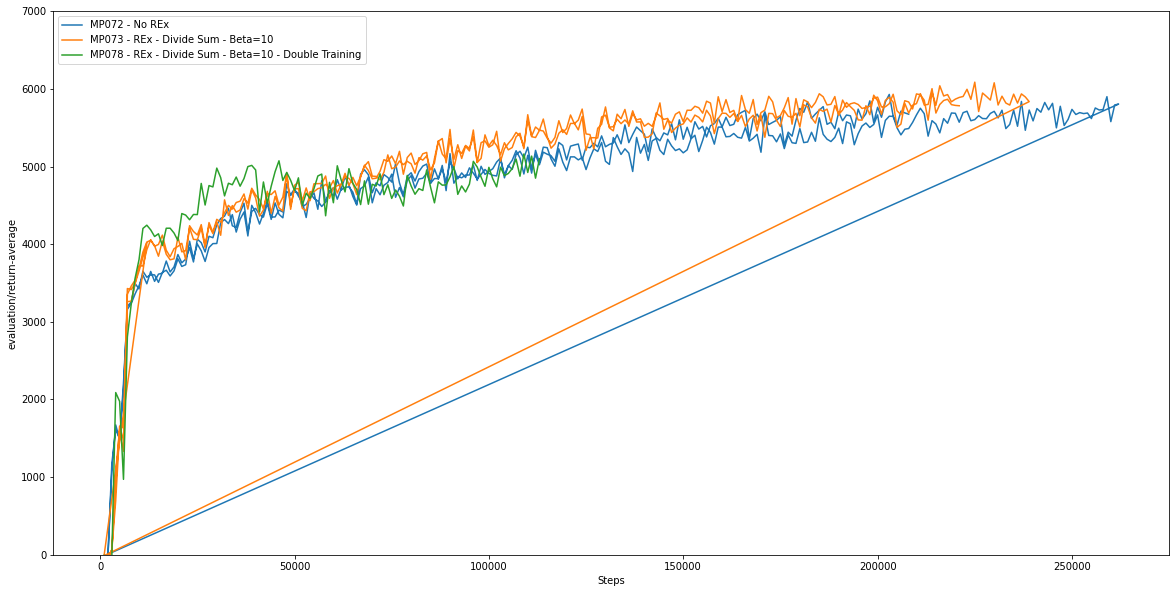

In [42]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
# ax.plot(MP068_df['timesteps_total'], MP068_df[feature], label='MP068 - No REx')
ax.plot(MP072_df['timesteps_total'], MP072_df[feature], label='MP072 - No REx')
# ax.plot(MP069_df['timesteps_total'], MP069_df[feature], label='MP069 - REx - Divide Sum - Beta=10')
ax.plot(MP073_df['timesteps_total'], MP073_df[feature], label='MP073 - REx - Divide Sum - Beta=10')
ax.plot(MP078_df['timesteps_total'], MP078_df[feature], label='MP078 - REx - Divide Sum - Beta=10 - Double Training')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.set_ylim(0,7000)
ax.legend(loc='upper left')
pass

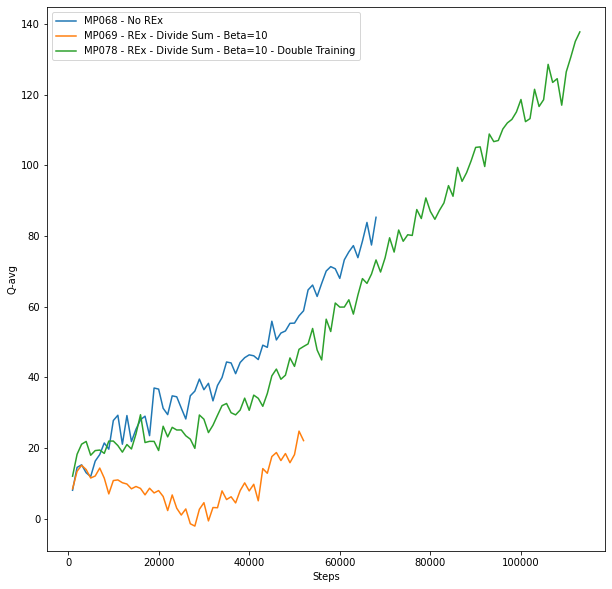

In [11]:
feature = 'Q-avg'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP068_df['timesteps_total'], MP068_df[feature], label='MP068 - No REx')
ax.plot(MP069_df['timesteps_total'], MP069_df[feature], label='MP069 - REx - Divide Sum - Beta=10')
ax.plot(MP078_df['timesteps_total'], MP078_df[feature], label='MP078 - REx - Divide Sum - Beta=10 - Double Training')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

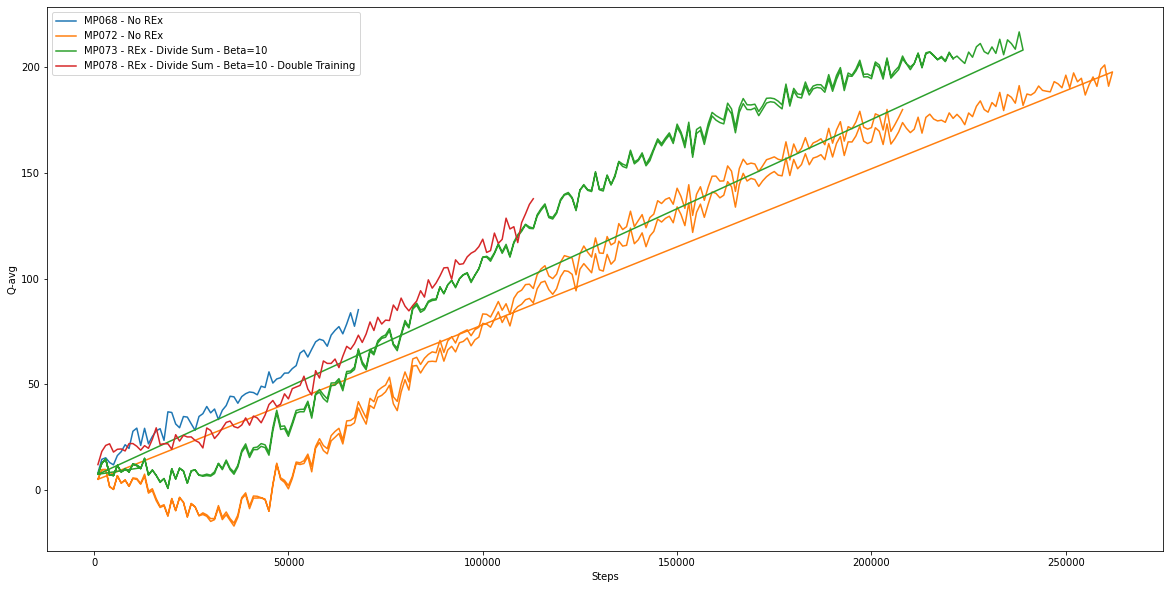

In [12]:
feature = 'Q-avg'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(MP068_df['timesteps_total'], MP068_df[feature], label='MP068 - No REx')
ax.plot(MP072_df['timesteps_total'], MP072_df[feature], label='MP072 - No REx')
ax.plot(MP073_df['timesteps_total'], MP073_df[feature], label='MP073 - REx - Divide Sum - Beta=10')
ax.plot(MP078_df['timesteps_total'], MP078_df[feature], label='MP078 - REx - Divide Sum - Beta=10 - Double Training')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

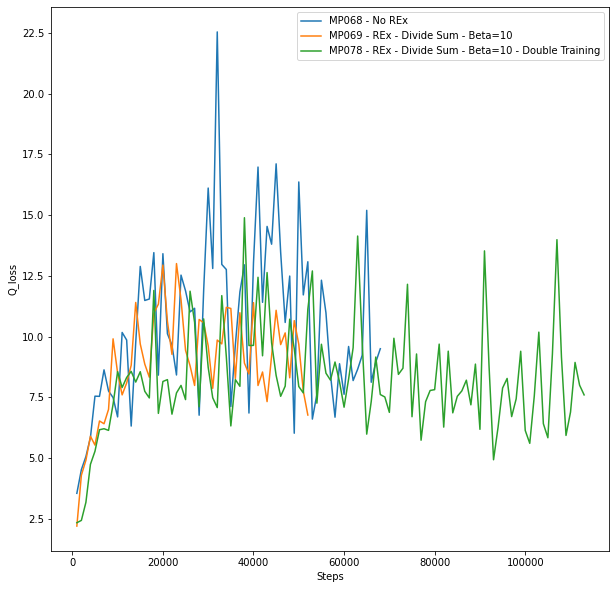

In [13]:
feature = 'Q_loss'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP068_df['timesteps_total'], MP068_df[feature], label='MP068 - No REx')
ax.plot(MP069_df['timesteps_total'], MP069_df[feature], label='MP069 - REx - Divide Sum - Beta=10')
ax.plot(MP078_df['timesteps_total'], MP078_df[feature], label='MP078 - REx - Divide Sum - Beta=10 - Double Training')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

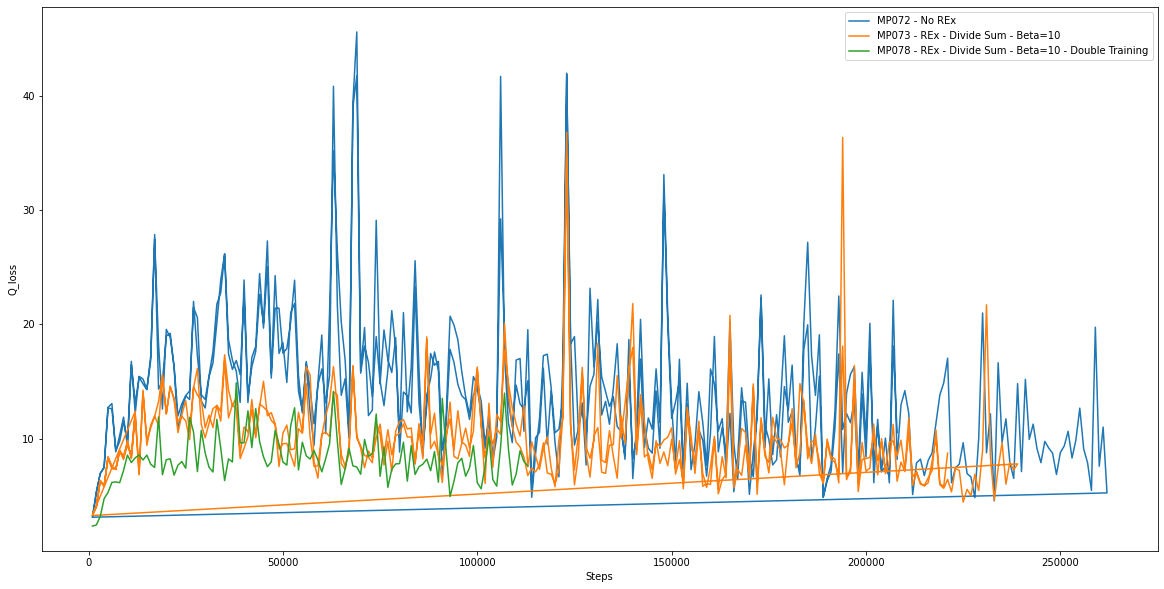

In [14]:
feature = 'Q_loss'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(MP072_df['timesteps_total'], MP072_df[feature], label='MP072 - No REx')
ax.plot(MP073_df['timesteps_total'], MP073_df[feature], label='MP073 - REx - Divide Sum - Beta=10')
ax.plot(MP078_df['timesteps_total'], MP078_df[feature], label='MP078 - REx - Divide Sum - Beta=10 - Double Training')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

# MP070-MP071, MP074-MP075, MP079

In [15]:
MP070_total_loss_df        = get_results("MP070", "model_loss_history.txt")
MP070_pol_total_loss_df    = get_results("MP070", "model_pol_total_loss_history.txt")
MP070_pol_var_loss_df      = get_results("MP070", "model_pol_var_loss_history.txt")
MP070_pol_mean_loss_df     = get_results("MP070", "model_mean_pol_loss_history.txt")
MP070_ho_total_loss_df     = get_results("MP070", "model_holdout_loss_history.txt")
MP070_ho_pol_total_loss_df = get_results("MP070", "model_holdout_pol_total_loss_history.txt")
MP070_ho_pol_var_loss_df   = get_results("MP070", "model_holdout_pol_var_loss_history.txt")
MP070_ho_pol_mean_loss_df  = get_results("MP070", "model_holdout_mean_pol_loss_history.txt")

MP071_total_loss_df        = get_results("MP071", "model_loss_history.txt")
MP071_pol_total_loss_df    = get_results("MP071", "model_pol_total_loss_history.txt")
MP071_pol_var_loss_df      = get_results("MP071", "model_pol_var_loss_history.txt")
MP071_pol_mean_loss_df     = get_results("MP071", "model_mean_pol_loss_history.txt")
MP071_ho_total_loss_df     = get_results("MP071", "model_holdout_loss_history.txt")
MP071_ho_pol_total_loss_df = get_results("MP071", "model_holdout_pol_total_loss_history.txt")
MP071_ho_pol_var_loss_df   = get_results("MP071", "model_holdout_pol_var_loss_history.txt")
MP071_ho_pol_mean_loss_df  = get_results("MP071", "model_holdout_mean_pol_loss_history.txt")

MP079_total_loss_df        = get_results("MP079", "model_loss_history.txt")
MP079_pol_total_loss_df    = get_results("MP079", "model_pol_total_loss_history.txt")
MP079_pol_var_loss_df      = get_results("MP079", "model_pol_var_loss_history.txt")
MP079_pol_mean_loss_df     = get_results("MP079", "model_mean_pol_loss_history.txt")
MP079_ho_total_loss_df     = get_results("MP079", "model_holdout_loss_history.txt")
MP079_ho_pol_total_loss_df = get_results("MP079", "model_holdout_pol_total_loss_history.txt")
MP079_ho_pol_var_loss_df   = get_results("MP079", "model_holdout_pol_var_loss_history.txt")
MP079_ho_pol_mean_loss_df  = get_results("MP079", "model_holdout_mean_pol_loss_history.txt")

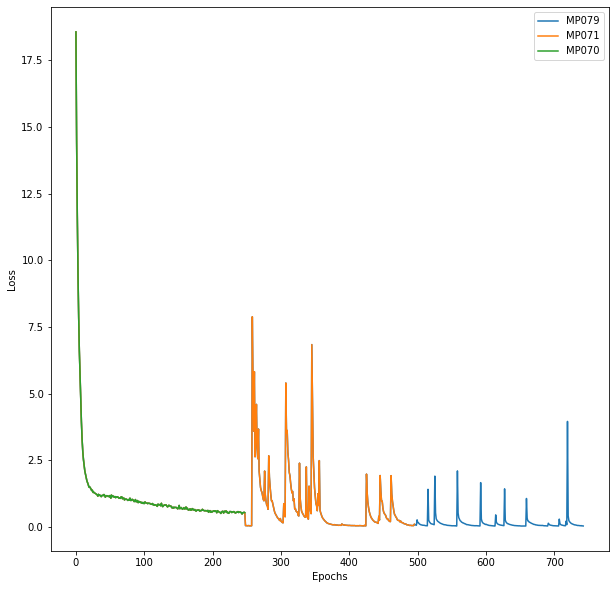

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP079_total_loss_df.mean(axis=1), label='MP079')
ax.plot(MP071_total_loss_df.mean(axis=1), label='MP071')
ax.plot(MP070_total_loss_df.mean(axis=1), label='MP070')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
pass

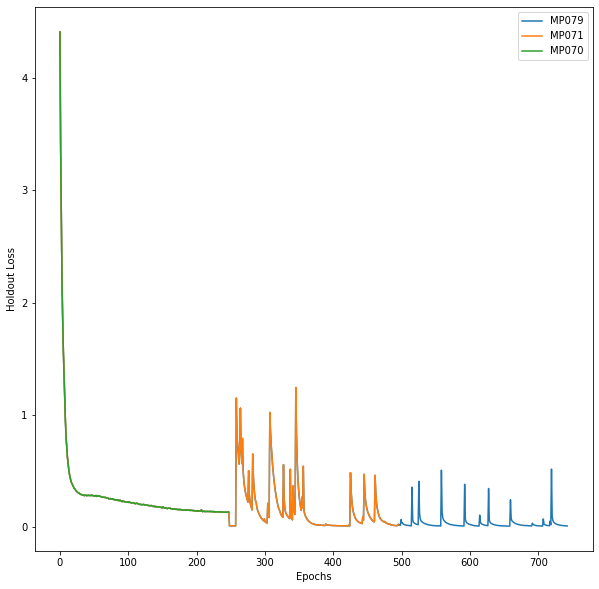

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP079_ho_total_loss_df.mean(axis=1), label='MP079')
ax.plot(MP071_ho_total_loss_df.mean(axis=1), label='MP071')
ax.plot(MP070_ho_total_loss_df.mean(axis=1), label='MP070')
ax.set_xlabel('Epochs')
ax.set_ylabel('Holdout Loss')
ax.legend()
pass

In [18]:
MP070_df = get_results("MP070", "result.json")
MP074_df = get_results("MP074", "result.json")

MP071_df = get_results("MP071", "result.json")
MP075_df = get_results("MP075", "result.json")
MP079_df = get_results("MP079", "result.json")

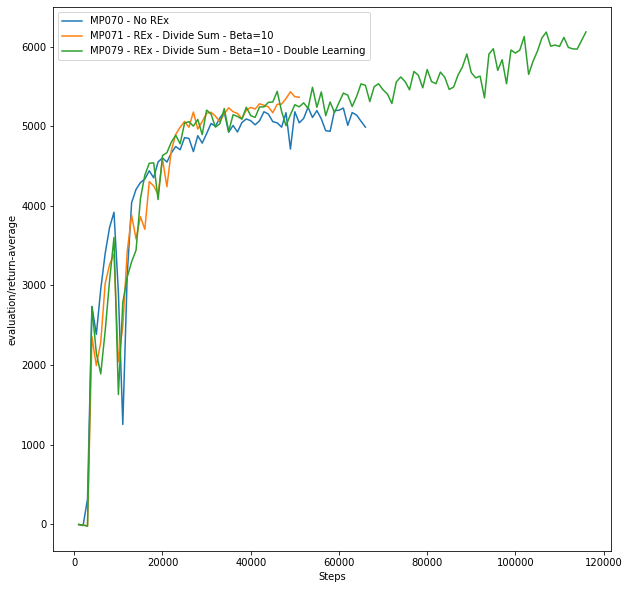

In [19]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP070_df['timesteps_total'], MP070_df[feature], label='MP070 - No REx')
ax.plot(MP071_df['timesteps_total'], MP071_df[feature], label='MP071 - REx - Divide Sum - Beta=10')
ax.plot(MP079_df['timesteps_total'], MP079_df[feature], label='MP079 - REx - Divide Sum - Beta=10 - Double Learning')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

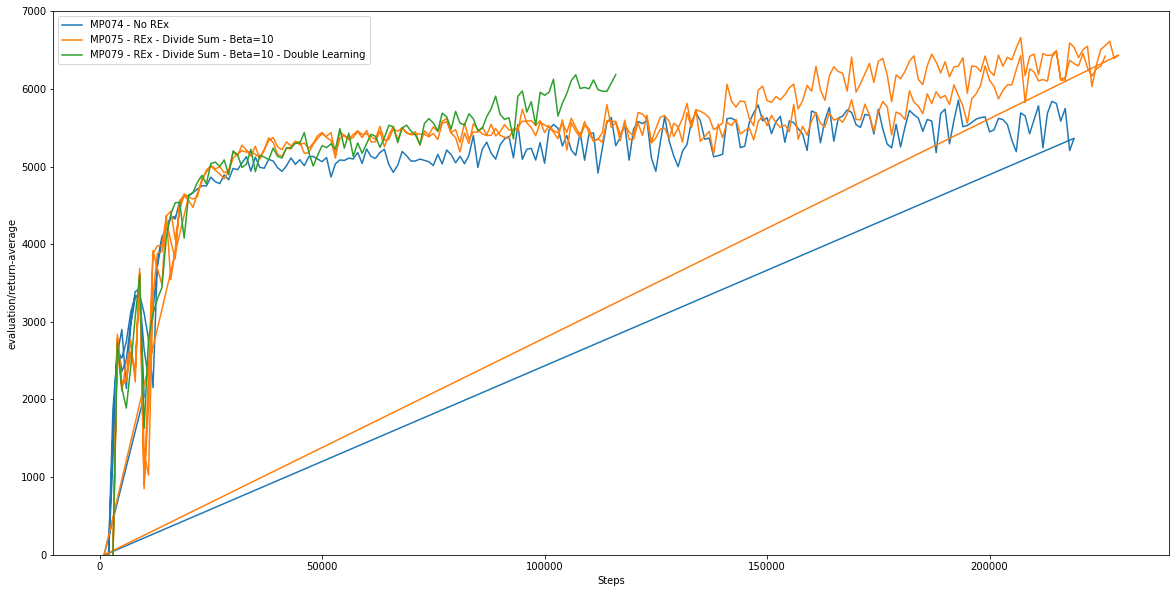

In [41]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
# ax.plot(MP070_df['timesteps_total'], MP070_df[feature], label='MP070 - No REx')
ax.plot(MP074_df['timesteps_total'], MP074_df[feature], label='MP074 - No REx')
# ax.plot(MP071_df['timesteps_total'], MP071_df[feature], label='MP071 - REx - Divide Sum - Beta=10')
ax.plot(MP075_df['timesteps_total'], MP075_df[feature], label='MP075 - REx - Divide Sum - Beta=10')
ax.plot(MP079_df['timesteps_total'], MP079_df[feature], label='MP079 - REx - Divide Sum - Beta=10 - Double Learning')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.set_ylim(0,7000)
ax.legend()
pass

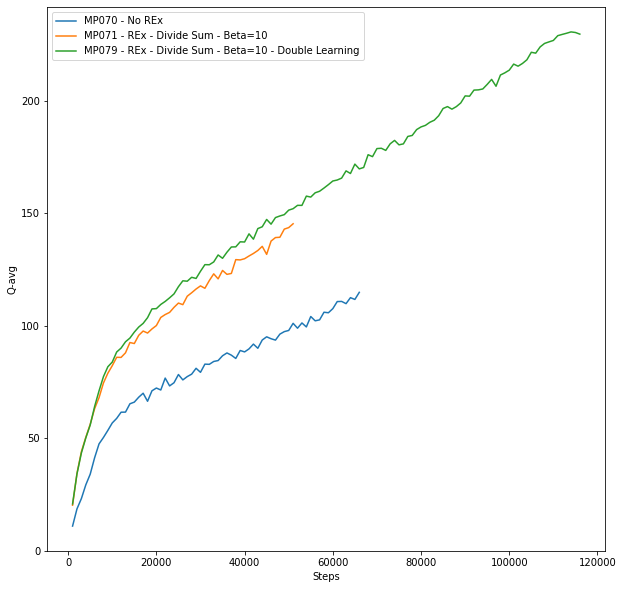

In [21]:
feature = 'Q-avg'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP070_df['timesteps_total'], MP070_df[feature], label='MP070 - No REx')
ax.plot(MP071_df['timesteps_total'], MP071_df[feature], label='MP071 - REx - Divide Sum - Beta=10')
ax.plot(MP079_df['timesteps_total'], MP079_df[feature], label='MP079 - REx - Divide Sum - Beta=10 - Double Learning')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

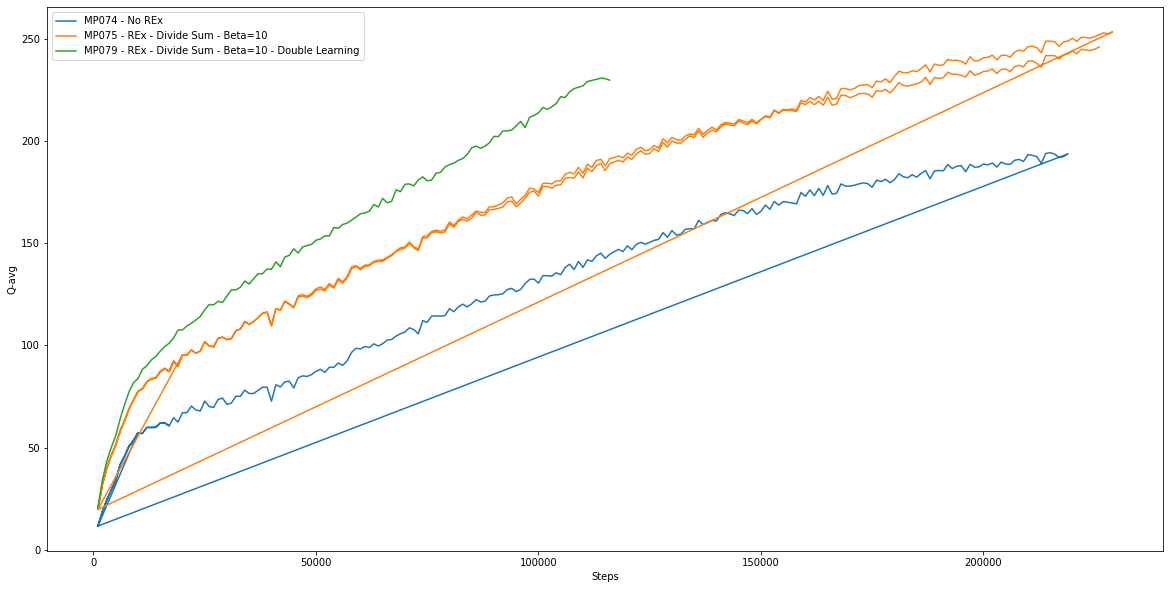

In [22]:
feature = 'Q-avg'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(MP074_df['timesteps_total'], MP074_df[feature], label='MP074 - No REx')
ax.plot(MP075_df['timesteps_total'], MP075_df[feature], label='MP075 - REx - Divide Sum - Beta=10')
ax.plot(MP079_df['timesteps_total'], MP079_df[feature], label='MP079 - REx - Divide Sum - Beta=10 - Double Learning')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

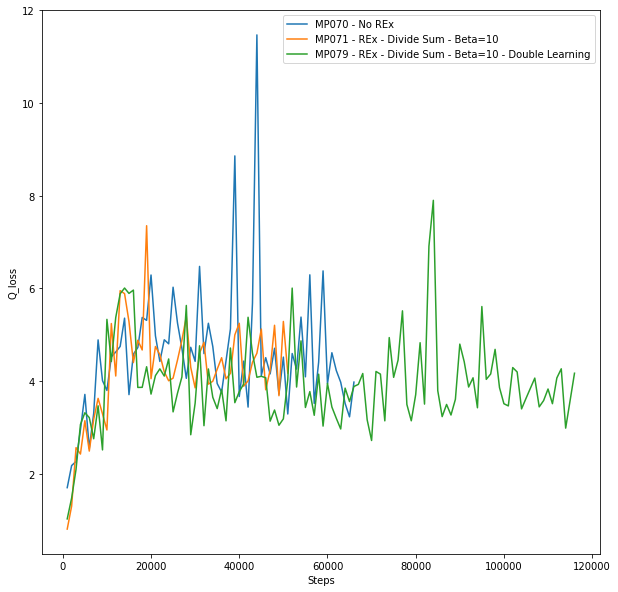

In [23]:
feature = 'Q_loss'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP070_df['timesteps_total'], MP070_df[feature], label='MP070 - No REx')
ax.plot(MP071_df['timesteps_total'], MP071_df[feature], label='MP071 - REx - Divide Sum - Beta=10')
ax.plot(MP079_df['timesteps_total'], MP079_df[feature], label='MP079 - REx - Divide Sum - Beta=10 - Double Learning')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

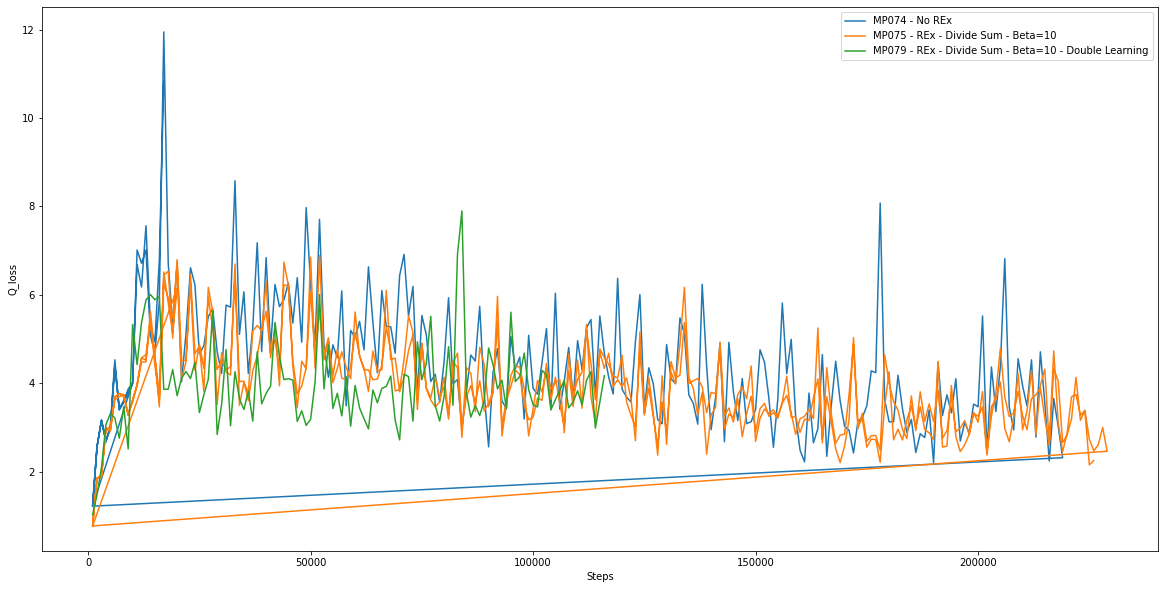

In [24]:
feature = 'Q_loss'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(MP074_df['timesteps_total'], MP074_df[feature], label='MP074 - No REx')
ax.plot(MP075_df['timesteps_total'], MP075_df[feature], label='MP075 - REx - Divide Sum - Beta=10')
ax.plot(MP079_df['timesteps_total'], MP079_df[feature], label='MP079 - REx - Divide Sum - Beta=10 - Double Learning')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

# MP076-MP077

In [25]:
MP076_total_loss_df        = get_results("MP076", "model_loss_history.txt")
MP076_pol_total_loss_df    = get_results("MP076", "model_pol_total_loss_history.txt")
MP076_pol_var_loss_df      = get_results("MP076", "model_pol_var_loss_history.txt")
MP076_pol_mean_loss_df     = get_results("MP076", "model_mean_pol_loss_history.txt")
MP076_ho_total_loss_df     = get_results("MP076", "model_holdout_loss_history.txt")
MP076_ho_pol_total_loss_df = get_results("MP076", "model_holdout_pol_total_loss_history.txt")
MP076_ho_pol_var_loss_df   = get_results("MP076", "model_holdout_pol_var_loss_history.txt")
MP076_ho_pol_mean_loss_df  = get_results("MP076", "model_holdout_mean_pol_loss_history.txt")

MP077_total_loss_df        = get_results("MP077", "model_loss_history.txt")
MP077_pol_total_loss_df    = get_results("MP077", "model_pol_total_loss_history.txt")
MP077_pol_var_loss_df      = get_results("MP077", "model_pol_var_loss_history.txt")
MP077_pol_mean_loss_df     = get_results("MP077", "model_mean_pol_loss_history.txt")
MP077_ho_total_loss_df     = get_results("MP077", "model_holdout_loss_history.txt")
MP077_ho_pol_total_loss_df = get_results("MP077", "model_holdout_pol_total_loss_history.txt")
MP077_ho_pol_var_loss_df   = get_results("MP077", "model_holdout_pol_var_loss_history.txt")
MP077_ho_pol_mean_loss_df  = get_results("MP077", "model_holdout_mean_pol_loss_history.txt")

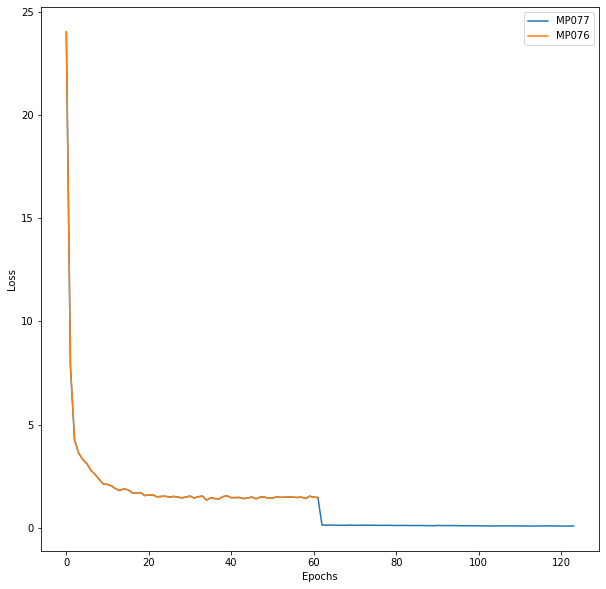

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP077_total_loss_df.mean(axis=1), label='MP077')
ax.plot(MP076_total_loss_df.mean(axis=1), label='MP076')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
pass

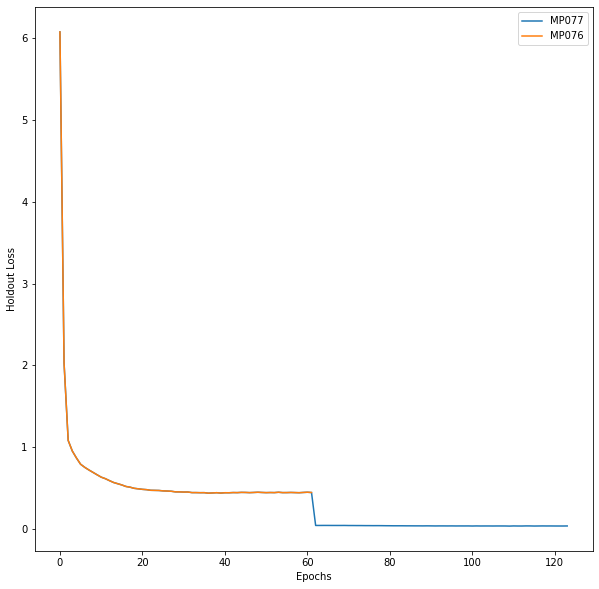

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP077_ho_total_loss_df.mean(axis=1), label='MP077')
ax.plot(MP076_ho_total_loss_df.mean(axis=1), label='MP076')
ax.set_xlabel('Epochs')
ax.set_ylabel('Holdout Loss')
ax.legend()
pass

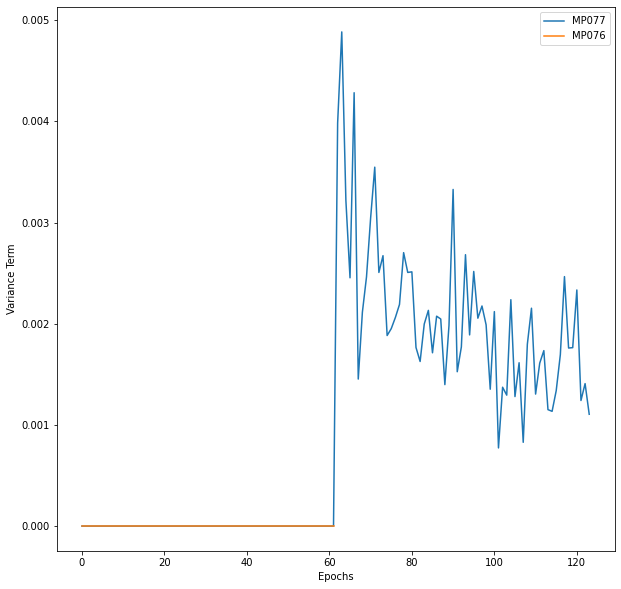

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP077_pol_var_loss_df.mean(axis=1), label='MP077')
ax.plot(MP076_pol_var_loss_df.mean(axis=1), label='MP076')
ax.set_xlabel('Epochs')
ax.set_ylabel('Variance Term')
ax.legend()
pass

In [37]:
MP076_df = get_results("MP076", "result.json")
MP077_df = get_results("MP077", "result.json")

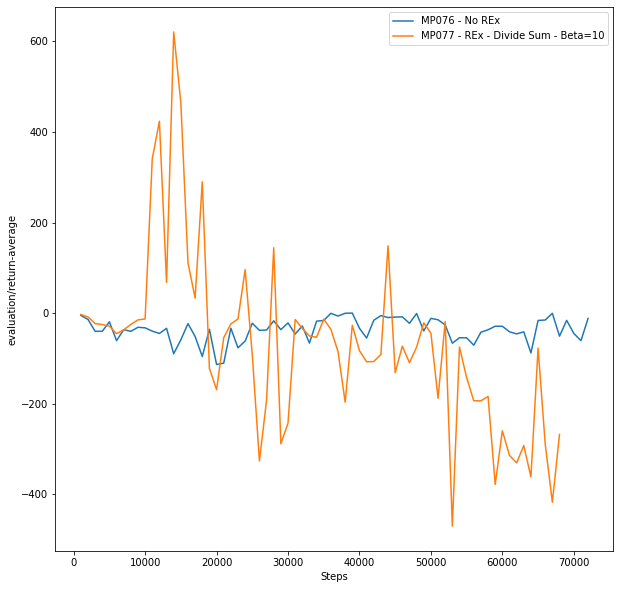

In [30]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP076_df['timesteps_total'], MP076_df[feature], label='MP076 - No REx')
ax.plot(MP077_df['timesteps_total'], MP077_df[feature], label='MP077 - REx - Divide Sum - Beta=10')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

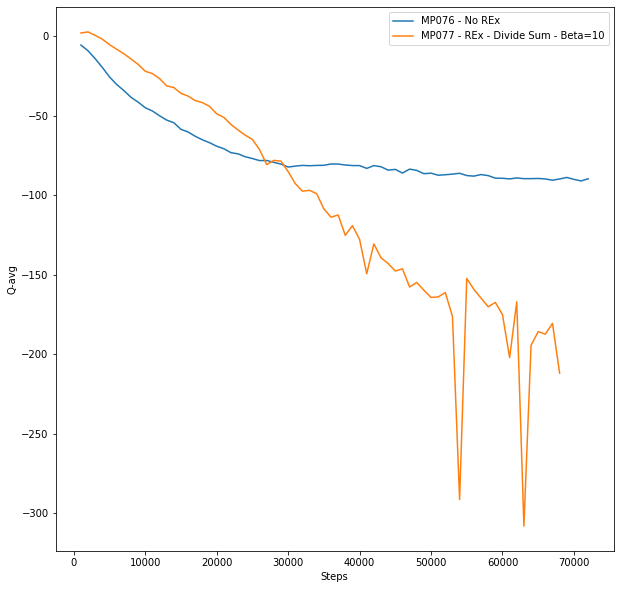

In [31]:
feature = 'Q-avg'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP076_df['timesteps_total'], MP076_df[feature], label='MP076 - No REx')
ax.plot(MP077_df['timesteps_total'], MP077_df[feature], label='MP077 - REx - Divide Sum - Beta=10')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

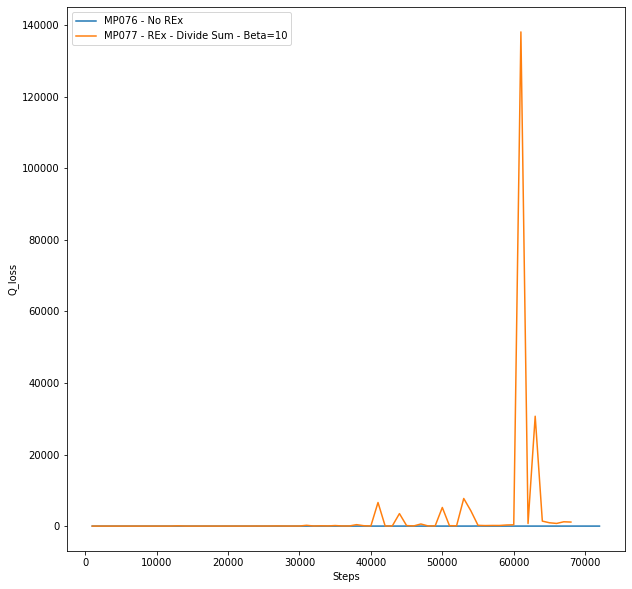

In [32]:
feature = 'Q_loss'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP076_df['timesteps_total'], MP076_df[feature], label='MP076 - No REx')
ax.plot(MP077_df['timesteps_total'], MP077_df[feature], label='MP077 - REx - Divide Sum - Beta=10')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass